# LAB13

## Author: Maria

In [31]:
import torch
import torchvision
import numpy as np

In [32]:
## Create random tensor to represent a 7x7 image with 3 channels
random_tensor = torch.rand(1,3,7,7)

## Use random_tensor as input into Conv2d
from torch import nn
trial_net = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1)
trial_output = trial_net(random_tensor)

## Check output shape
print(trial_output.shape)

## Check weights shape
print(trial_net.weight.shape)

## Check bias shape
print(trial_net.bias.shape)

torch.Size([1, 4, 5, 5])
torch.Size([4, 3, 3, 3])
torch.Size([4])


In [33]:
trial_net.weight[1,:,:]

tensor([[[ 0.1831,  0.1379,  0.1225],
         [ 0.1863, -0.1182, -0.1292],
         [ 0.0845, -0.0117,  0.1659]],

        [[-0.1663,  0.0624, -0.1375],
         [ 0.1236,  0.1520, -0.1684],
         [ 0.0380,  0.1117, -0.0041]],

        [[ 0.0789,  0.0885,  0.1368],
         [ 0.0431,  0.0892,  0.0684],
         [-0.0601,  0.0786, -0.1343]]], grad_fn=<SelectBackward0>)

### Q1

#### Part A:

If the number of output layers is 5, number of weights = $5\cdot 4 \cdot 4=80$, number of bias = $1\cdot 5=5$.

#### Part B

Since MNIST consists of 28x28 pixel grayscale images and kernel size is 4x4 with stride=2, the dimensions of each feature map produced by this layer is 13x13, since $\frac{28-4}{2}+1=13$ (floor function)

### Q2

In [34]:
random_tensor = torch.rand(1,1,4,4)
print(random_tensor)


trial_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
pool_output = trial_pool(random_tensor)
print(pool_output)

avg_pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
pool_output = avg_pool(random_tensor)
print(pool_output)


## Randomly generated 1x5x5 tensor
random_tensor = torch.rand(1,1,5,5)

## Two different pooling operations
ceil_false = nn.MaxPool2d(kernel_size = 2, stride = 2, ceil_mode = False)
ceil_true = nn.MaxPool2d(kernel_size = 2, stride = 2, ceil_mode = True)

## Note the difference in output shape
print(ceil_false(random_tensor).shape)
print(ceil_true(random_tensor).shape)

tensor([[[[0.8862, 0.6727, 0.6601, 0.9046],
          [0.0561, 0.3830, 0.9666, 0.7724],
          [0.7462, 0.1522, 0.2509, 0.7076],
          [0.6328, 0.2610, 0.7956, 0.7845]]]])
tensor([[[[0.8862, 0.9666],
          [0.7462, 0.7956]]]])
tensor([[[[0.4995, 0.8259],
          [0.4481, 0.6347]]]])
torch.Size([1, 1, 2, 2])
torch.Size([1, 1, 3, 3])


In [35]:
#### Part A

relu = nn.ReLU()
pool = nn.MaxPool2d(kernel_size=2, stride=2)

# ReLU first, then Max Pool
out_relu_then_pool = pool(relu(trial_output))

# Max Pool first, then ReLU
out_pool_then_relu = relu(pool(trial_output))

print(out_relu_then_pool)
print(out_relu_then_pool.shape)

print(out_pool_then_relu)
print(out_pool_then_relu.shape)

# check if they are identical
print(torch.equal(out_relu_then_pool, out_pool_then_relu))


tensor([[[[0.0000, 0.0000],
          [0.0452, 0.0000]],

         [[0.9005, 0.8375],
          [0.7683, 0.7995]],

         [[0.0000, 0.0000],
          [0.0000, 0.0000]],

         [[0.5341, 0.5834],
          [0.6137, 0.8002]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)
torch.Size([1, 4, 2, 2])
tensor([[[[0.0000, 0.0000],
          [0.0452, 0.0000]],

         [[0.9005, 0.8375],
          [0.7683, 0.7995]],

         [[0.0000, 0.0000],
          [0.0000, 0.0000]],

         [[0.5341, 0.5834],
          [0.6137, 0.8002]]]], grad_fn=<ReluBackward0>)
torch.Size([1, 4, 2, 2])
True


They are identical. Order doesn't matter in this case.

In [36]:
#### Part B
import torch
from torch import nn

relu = nn.ReLU()
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

a = avgpool(relu(trial_output))
b = relu(avgpool(trial_output))


print(torch.equal(a, b))


False


Unlike Part A, these 2 operations do not producte the identical output. 
ReLu affects the output before averaging whereas averaging before ReLu allows the negative numbers
to affect the mean. 

### Q3

#### Part A
After conv2d: the dimension is (10, 25, 25), since $\frac{28-4}{1}+1=25$

After ReLu: the dimension is (10, 25, 25), since ReLu doesn't change dimensions.

After MaxPool2d, the dimension is (10, 12, 12), since floor function of $\frac{25}{2}=12$.

#### Part B
No.
Even though Conv2d can accept different image sizes, the later Linear(750, 250) layer requires the flattened output to be exactly 750 values. Changing the input size changes the flattened size, so the network only works for image sizes that produce 750 features.

#### Part C

The value 750 comes from the size of the feature map after all the convolutions and pooling.

After the first Conv & Pool: 10 x 12 x 12

After the second Conv & Pool: 30 x 5 x 5


So flattening the final output produces
$30\cdot 5 \cdot 5=750$

We should only if we also change the preceding layers so that the flattened output matches the new value.

#### Part D

Yes. The value 250 is just the number of hidden units in that Linear layer, so it can be changed freely. Only the input size (750) is fixed by the convolution layers. As long as later layers are updated accordingly, the network can still use the same Fashion MNIST input format.

### Q4

In [37]:
#### Part A

import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


path = "C:/Users/kimin/Documents/STA395/cats_dogs/"


img_names = os.listdir(path)


images = np.empty((150, 64, 64, 3))


for idx, name in enumerate(img_names):
    img_path = path + name
    image = plt.imread(img_path)
    images[idx] = image


labels = np.repeat([1, 0], [50, 100])


X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=0.25,
    random_state=5
)


print(images[0].shape) 


import torch


X_train_t = torch.from_numpy(X_train).float()
X_test_t  = torch.from_numpy(X_test).float()

# Move color channels from last dim to 1
X_train_t = torch.movedim(X_train_t, 3, 1)
X_test_t  = torch.movedim(X_test_t, 3, 1)


y_train_t = torch.from_numpy(y_train).long()
y_test_t  = torch.from_numpy(y_test).long()

print(X_train_t.shape)
print(X_test_t.shape)  



(64, 64, 3)
torch.Size([112, 3, 64, 64])
torch.Size([38, 3, 64, 64])


In [38]:
#### Part B

from torchvision import transforms
data_transforms = transforms.Compose([
        transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 5)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((0, 180))
])


In [39]:
#### Part C

class cats_dogs_net(nn.Module):
    
    def __init__(self):
        super(cats_dogs_net, self).__init__()
        
        self.conv_stack = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1),   # (8, 62, 62)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # (8, 31, 31)
            nn.Conv2d(8, 16, kernel_size=2, stride=1),  # (16, 30, 30)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # (16, 15, 15)
            nn.Flatten(),                               # 16*15*15 = 3600
            nn.Linear(3600, 200),
            nn.ReLU(),
            nn.Linear(200, 2)  
        )
        
    def forward(self, x):
        return self.conv_stack(x)


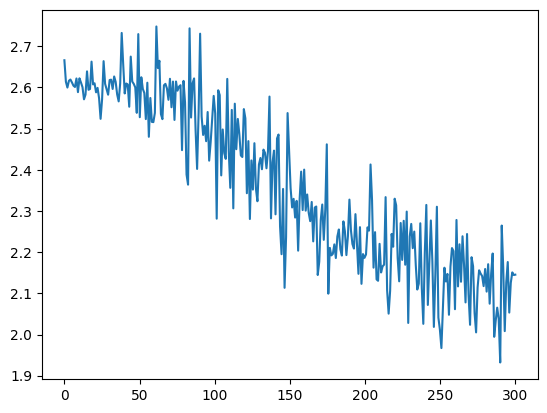

Training Accuracy: 0.7142857142857143


In [40]:
from torch.utils.data import DataLoader, TensorDataset

epochs = 300
lrate = 0.001
bsize = 28

torch.manual_seed(3)


train_loader = DataLoader(
    TensorDataset(X_train_t.type(torch.FloatTensor),
                  y_train_t.type(torch.LongTensor)),
    batch_size = bsize
)

test_loader = DataLoader(
    TensorDataset(X_test_t.type(torch.FloatTensor),
                  y_test_t.type(torch.LongTensor)),
    batch_size = bsize
)


net = cats_dogs_net()


cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = lrate)


track_cost = np.zeros(epochs)
cur_cost = 0.0


for epoch in range(epochs):
    
    cur_cost = 0.0
    
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        inputs = data_transforms(inputs)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        cost = cost_fn(nn.Softmax(dim=1)(outputs), labels)
        
        cost.backward()
        optimizer.step()
        cur_cost += cost.item()
    
    track_cost[epoch] = cur_cost

plt.plot(np.linspace(0, epochs, epochs), track_cost)
plt.show()

# Training
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Training Accuracy:", correct/total)




In [41]:
#### Part E

# Test 
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Test Accuracy:", correct/total)

Test Accuracy: 0.7894736842105263
